In [1]:
import commentjson
from box import Box
from pprint import pprint
import os
from glob import glob
import multiprocessing
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import tensorflow as tf
import multiprocessing
threads = multiprocessing.cpu_count()
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [16]:
RESULTS_FILE = '/aidata/anders/objects/landmarks/AFLW/archive_model/noDIV/debugger/debugger_results.csv'
layer_stats = pd.read_csv(RESULTS_FILE)

layer_stats['range'] = 255.0 * layer_stats['scale']
layer_stats['rmse/scale'] = layer_stats.apply(
    lambda row: np.sqrt(row['mean_squared_error']) / row['scale'], axis=1)
display(HTML(layer_stats.to_html()))

,op_name,tensor_idx,num_elements,stddev,mean_error,max_abs_error,mean_squared_error,scale,zero_point,tensor_name,range,rmse/scale
0,DEPTHWISE_CONV_2D,399,46080.0,0.025430,0.007112,0.080019,6.974012e-04,0.081298,-23,backbone/hard_net/conv_block/sp_conv/separable_conv2d/depthwise;backbone/hard_net/conv_block/sp_conv/separable_conv2d/depthwise2,20.730972,0.324834
1,CONV_2D,403,368640.0,0.028786,-0.000760,0.142435,8.292275e-04,0.106532,-128,backbone/hard_net/conv_block/act_relu/Relu;backbone/hard_net/conv_block/act_relu/Relu;backbone/hard_net/conv_block/bn/FusedBatchNormV3;backbone/hard_net/conv_block/bn/FusedBatchNormV3;backbone/hard_net/conv_block_1/sp_conv/separable_conv2d/depthwise;backbone/hard_net/conv_block_1/sp_conv/separable_conv2d/depthwise;backbone/hard_net/conv_block/sp_conv/separable_conv2d;backbone/hard_net/conv_block/sp_conv/separable_conv2d,27.165730,0.270306
2,DEPTHWISE_CONV_2D,407,368640.0,0.208323,-0.000936,0.844309,4.339971e-02,0.712415,6,backbone/hard_net/conv_block_1/sp_conv/separable_conv2d/depthwise;backbone/hard_net/conv_block_1/sp_conv/separable_conv2d/depthwise2,181.665912,0.292422
3,CONV_2D,411,737280.0,0.068704,-0.000460,19.803780,4.766085e-03,0.049047,-128,backbone/hard_net/conv_block_1/act_relu/Relu;backbone/hard_net/conv_block_1/act_relu/Relu;backbone/hard_net/conv_block_1/bn/FusedBatchNormV3;backbone/hard_net/conv_block_1/bn/FusedBatchNormV3;backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d/depthwise;backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d/depthwise;backbone/hard_net/conv_block_1/sp_conv/separable_conv2d;backbone/hard_net/conv_block_1/sp_conv/separable_conv2d,12.507021,1.407561
4,AVERAGE_POOL_2D,415,184320.0,0.000000,0.000000,0.000000,0.000000e+00,0.049047,-128,backbone/hard_net/init_avg_pool/AvgPool;backbone/hard_net/init_avg_pool/AvgPool,12.507021,0.000000
5,DEPTHWISE_CONV_2D,421,184320.0,0.072589,0.002230,0.302066,5.274224e-03,0.241145,4,backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d/depthwise;backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d/depthwise2,61.492052,0.301162
6,CONV_2D,425,53760.0,0.017539,0.000713,0.062770,3.081310e-04,0.061845,-128,backbone/hard_net/down_hard_blk1/conv_block_2/act_relu/Relu;backbone/hard_net/down_hard_blk1/conv_block_2/act_relu/Relu;backbone/hard_net/down_hard_blk1/conv_block_2/bn/FusedBatchNormV3;backbone/hard_net/down_hard_blk1/conv_block_2/bn/FusedBatchNormV3;backbone/hard_net/down_hard_blk1/conv_block_4/sp_conv/separable_conv2d;backbone/hard_net/down_hard_blk1/conv_block_4/sp_conv/separable_conv2d;backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d;backbone/hard_net/down_hard_blk1/conv_block_2/sp_conv/separable_conv2d,15.770514,0.283832
7,CONCATENATION,431,238080.0,0.000000,0.000000,0.000000,0.000000e+00,0.044452,-128,backbone/hard_net/down_hard_blk1/concat;backbone/hard_net/down_hard_blk1/concat,11.335255,0.000000
8,DEPTHWISE_CONV_2D,435,238080.0,0.083142,-0.001177,0.299231,6.914018e-03,0.273327,-17,backbone/hard_net/down_hard_blk1/conv_block_3/sp_conv/separable_conv2d/depthwise;backbone/hard_net/down_hard_blk1/conv_block_3/sp_conv/separable_conv2d/depthwise2,69.698270,0.304217
9,CONV_2D,439,84480.0,0.015260,0.000808,0.098337,2.335268e-04,0.049047,-128,backbone/hard_net/down_hard_blk1/conv_block_3/act_relu/Relu;backbone/hard_net/down_hard_blk1/conv_block_3/act_relu/Relu;backbone/hard_net/down_hard_blk1/conv_block_3/bn/FusedBatchNormV3;backbone/hard_net/down_hard_blk1/conv_block_3/bn/FusedBatchNormV3;backbone/hard_net/down_hard_blk1/conv_block_4/sp_conv/separable_conv2d/depthwise;backbone/hard_net/down_hard_blk1/conv_block_4/sp_conv/separable_conv2d/depthwise;backbone/hard_net/down_hard_blk1/conv_block_3/sp_conv/separable_conv2d;backbone/hard_net/down_hard_blk1/conv_block_3/sp_conv/separable_conv2d,12.507021,0.311569


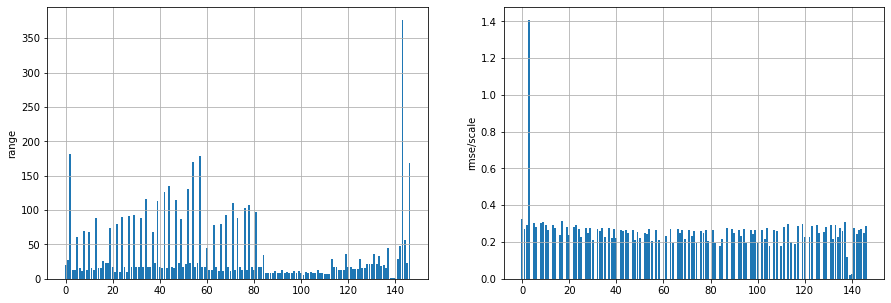

In [17]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.bar(np.arange(len(layer_stats)), layer_stats['range'])
ax1.set_ylabel('range')
plt.grid()
ax2 = plt.subplot(122)
ax2.bar(np.arange(len(layer_stats)), layer_stats['rmse/scale'])
ax2.set_ylabel('rmse/scale')
plt.grid()
plt.show()